### Reference:
https://www.kaggle.com/lava18/google-play-store-apps/kernels

https://www.kaggle.com/basu369victor/sentiment-analysis-with-googleplaystoreapp-reviews

https://www.kaggle.com/alihannka/natural-language-processing-tutorial

https://www.kaggle.com/etatbak/nlp-google-store-reviews


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read Data
Data=pd.read_csv("googleplaystore_user_reviews.csv",encoding="latin1")
Data.head(10)

Data.dropna(axis=0,inplace=True) 

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


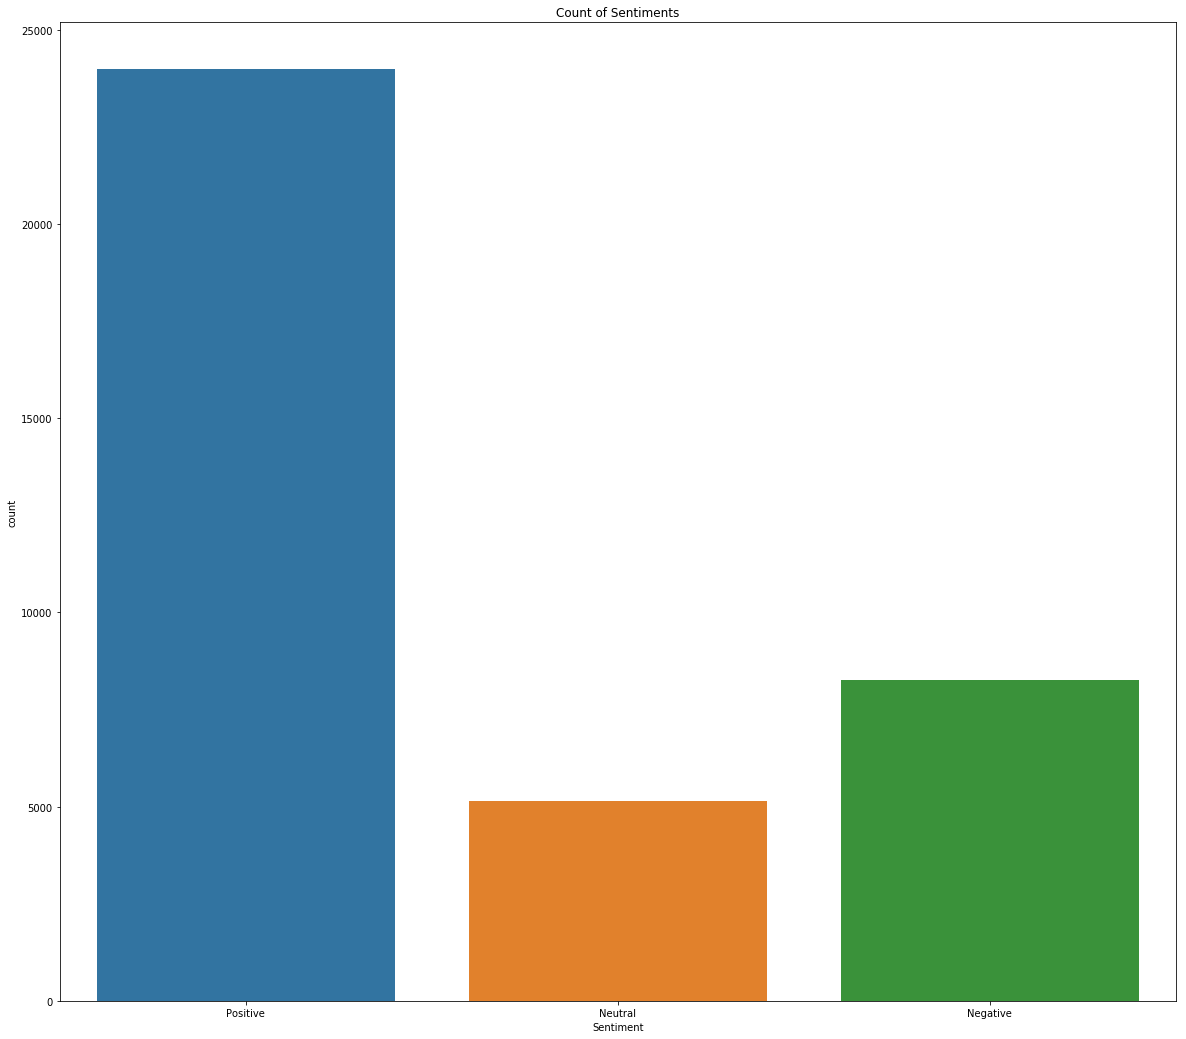

In [13]:
# See the distribution of the sentiment
sns.countplot(Data.Sentiment)
print(Data.Sentiment.value_counts())
plt.title("Count of Sentiments")
plt.show()

### From the plot we could know that most reviews are positive and nearly 1 in 4 reviews are negative

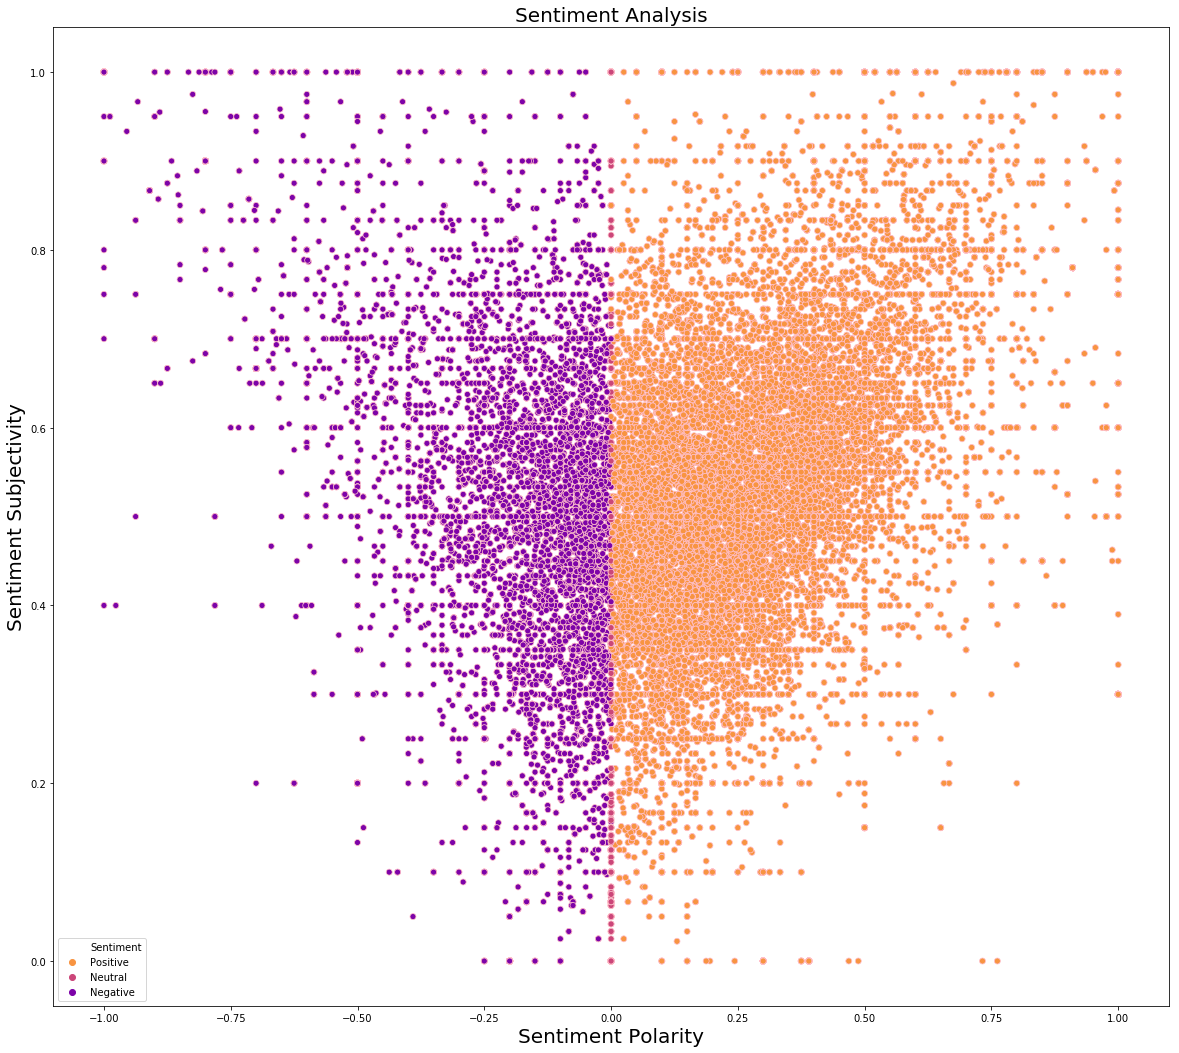

In [14]:

## See the sentiment score distribution by using scatter plot
plt.figure(figsize=(20,18))
j = sns.scatterplot(Data['Sentiment_Polarity'],Data['Sentiment_Subjectivity'],hue=Data['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [15]:
Data=pd.concat([Data.Translated_Review,Data.Sentiment],axis=1)
Data.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in Data.Sentiment]

In [38]:
#Data cleaning
#Here we will remove characters which are not letters. ":) # $ @ ()!-/*" like that!
#Also converting them lower case.
import re
first_text=Data.Translated_Review[0]
print(first_text)
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"


In [44]:
import re ## Regular expression for deleting characters which are not letters.
first_sample = Data.Translated_Review[0] 
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()
print("[{}] convert to \n[{}]".format(Data.Translated_Review[0],sample))

[I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"] convert to 
[i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  ]


In [45]:
## import libraries

import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 

sample=nltk.word_tokenize(sample)
print(sample)

['i', 'like', 'eat', 'delicious', 'food', 'that', 's', 'i', 'm', 'cooking', 'food', 'myself', 'case', 'best', 'foods', 'helps', 'lot', 'also', 'best', 'before', 'shelf', 'life']


In [46]:
sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample)   ## drop unnecesarry words like it, I, you.

['like', 'eat', 'delicious', 'food', 'cooking', 'food', 'case', 'best', 'foods', 'helps', 'lot', 'also', 'best', 'shelf', 'life']


In [20]:
lemma = nltk.WordNetLemmatizer()  ##We have already imported nltk.
sample = [ lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)
## for this example there is no paragoge I cant show you but if there is -ed or -s or something like these,
## lemmatizer will drop them and returns stem of word

In [21]:
## Need to drop Na First
text_list=[]
for i in Data.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

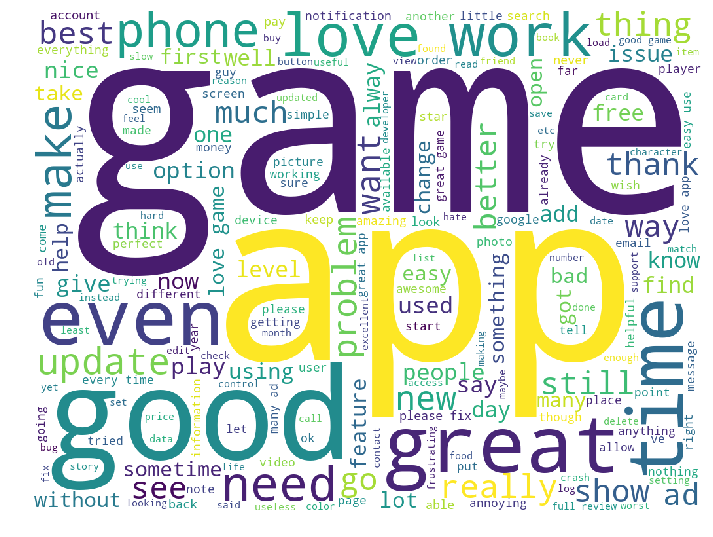

In [37]:
# show most used words in WordCloud
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(text_list))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Using machine learning technique to predict the Sentiment of those reviews

In [24]:
y = Data.iloc[:,1].values
x= cou_vec.fit_transform(text_list).toarray()
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)
print("accuracy: ",rf.score(xtest,ytest))

accuracy:  0.8936681806037937


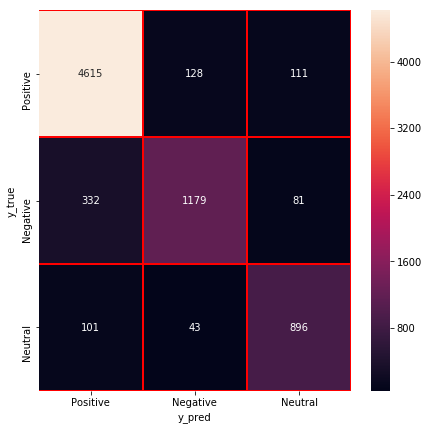

In [31]:
# Show confusion matrix
y_pred=rf.predict(xtest)
y_true=ytest
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

###  try with Naive Bayes 

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.5903018968741651


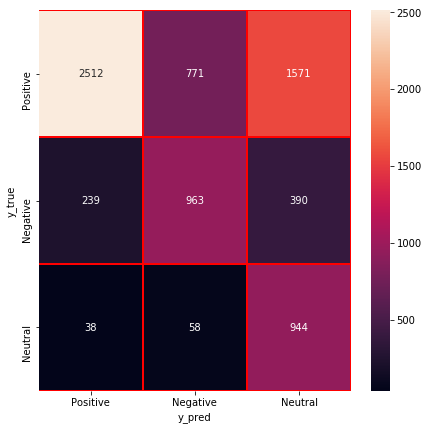

In [30]:
# Show confusion matrix
y_pred=nb.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()